In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [19]:
df = pd.read_csv("/Users/shakthimaha/Downloads/zcored_data.csv")

In [22]:
numeric_cols = df.select_dtypes(include=['float64']).columns
df_numeric = df[numeric_cols]

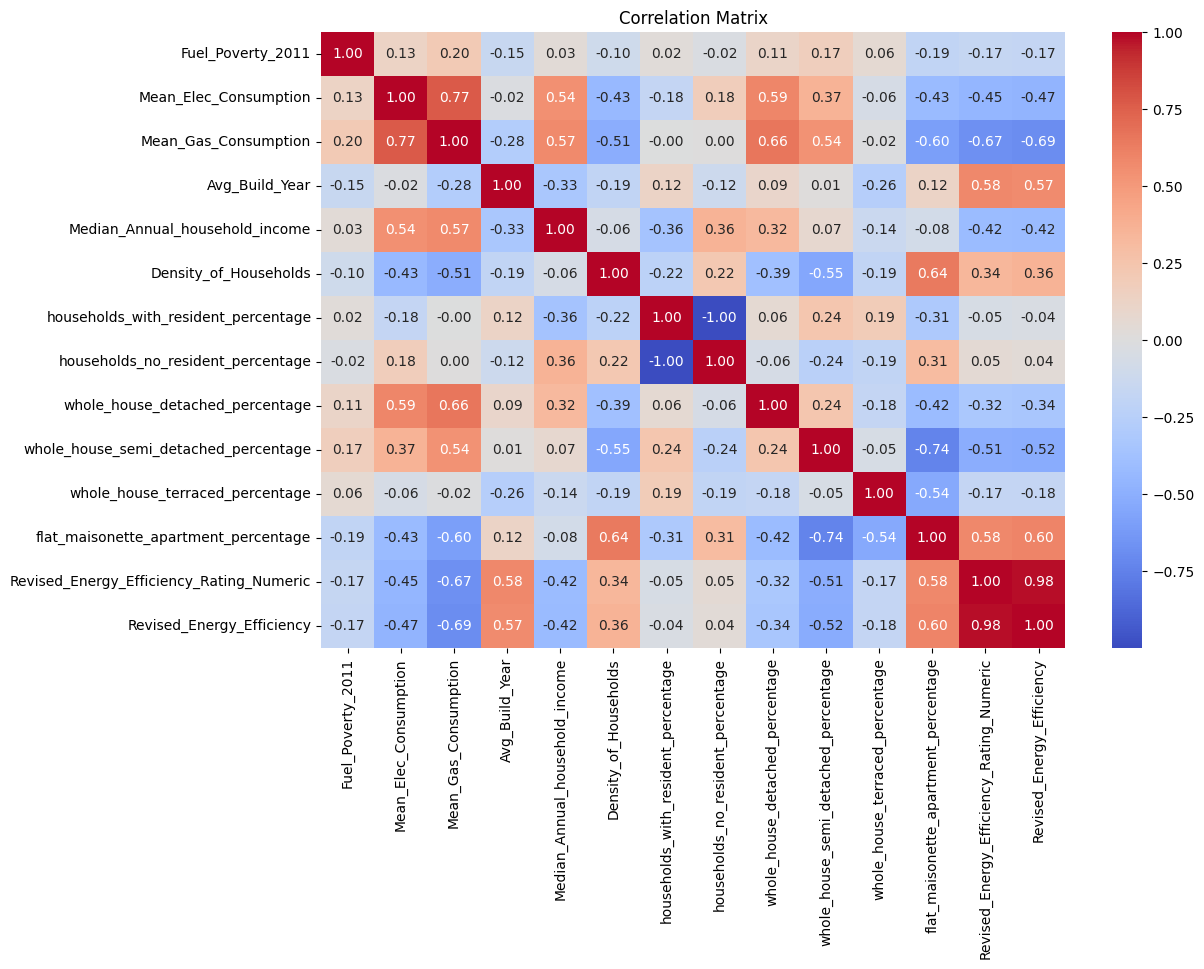

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:


# Compute the correlation matrix
corr_matrix = df_numeric.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate values
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation above 0.75
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

# Print highly correlated features
print("Highly correlated features (above 0.75):")
print(high_corr_features)

Highly correlated features (above 0.75):
['Mean_Gas_Consumption', 'households_no_resident_percentage', 'Revised_Energy_Efficiency']


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Add a constant column for VIF calculation
from statsmodels.tools.tools import add_constant

df_vif = add_constant(df_numeric)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i+1) for i in range(len(df_numeric.columns))]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features
X = df_numeric.drop(columns=['Fuel_Poverty_2011'])  # Exclude target variable

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display features with high VIF
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values(by="VIF", ascending=False))
print(vif_data)

Variance Inflation Factor (VIF) for each feature:
                                     Feature           VIF
5        households_with_resident_percentage  1.120735e+06
6          households_no_resident_percentage  1.120723e+06
10      flat_maisonette_apartment_percentage  2.587585e+03
8       whole_house_semi_detached_percentage  1.204256e+03
9            whole_house_terraced_percentage  1.058111e+03
7            whole_house_detached_percentage  3.563562e+02
1                       Mean_Gas_Consumption  6.777394e+00
12                 Revised_Energy_Efficiency  3.660667e+00
0                      Mean_Elec_Consumption  3.272289e+00
2                             Avg_Build_Year  3.025940e+00
4                      Density_of_Households  2.274286e+00
3             Median_Annual_household_income  2.220342e+00
11  Revised_Energy_Efficiency_Rating_Numeric  1.012089e+00
                                     Feature           VIF
0                      Mean_Elec_Consumption  3.272289e+00
1     

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features
X = df_numeric.drop(columns=['Fuel_Poverty_2011'])  # Exclude target variable

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display features with high VIF
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values(by="VIF", ascending=False))

Variance Inflation Factor (VIF) for each feature:
                                     Feature           VIF
5        households_with_resident_percentage  1.120735e+06
6          households_no_resident_percentage  1.120723e+06
10      flat_maisonette_apartment_percentage  2.587585e+03
8       whole_house_semi_detached_percentage  1.204256e+03
9            whole_house_terraced_percentage  1.058111e+03
7            whole_house_detached_percentage  3.563562e+02
1                       Mean_Gas_Consumption  6.777394e+00
12                 Revised_Energy_Efficiency  3.660667e+00
0                      Mean_Elec_Consumption  3.272289e+00
2                             Avg_Build_Year  3.025940e+00
4                      Density_of_Households  2.274286e+00
3             Median_Annual_household_income  2.220342e+00
11  Revised_Energy_Efficiency_Rating_Numeric  1.012089e+00


In [28]:
# Drop selected features based on high correlation and high VIF
df_selected = df_numeric.drop(columns=["Mean_Gas_Consumption", "whole_house_detached_percentage"])  # Example features

# Print remaining columns after dropping
print("Remaining Features after Removing Multicollinearity:")
print(df_selected.columns)

Remaining Features after Removing Multicollinearity:
Index(['Fuel_Poverty_2011', 'Mean_Elec_Consumption', 'Avg_Build_Year',
       'Median_Annual_household_income', 'Density_of_Households',
       'households_with_resident_percentage',
       'households_no_resident_percentage',
       'whole_house_semi_detached_percentage',
       'whole_house_terraced_percentage',
       'flat_maisonette_apartment_percentage',
       'Revised_Energy_Efficiency_Rating_Numeric',
       'Revised_Energy_Efficiency'],
      dtype='object')


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define target and features
X = df_selected.drop(columns=["Fuel_Poverty_2011"])  # Exclude target
y = df_numeric["Fuel_Poverty_2011"]  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error after Feature Selection: {mse:.4f}")

Mean Squared Error after Feature Selection: 0.9451


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data (PCA requires standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  # Choose the number of components based on explained variance
X_pca = pca.fit_transform(X_scaled)

# Print explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Each Principal Component:")
print(explained_variance)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(5)])
pca_df["Fuel_Poverty_2011"] = y

# Print new dataset after PCA
print(pca_df.head())

Explained Variance by Each Principal Component:
[0.36841108 0.24361787 0.14092053 0.09427375 0.06288468]
        PC1       PC2       PC3       PC4       PC5  Fuel_Poverty_2011
0  1.808977  5.157750  1.507316  0.197319 -0.196663          -2.061354
1  2.459711  5.021987  2.654838  1.407262 -0.193187          -2.137367
2  3.389292  2.374192 -0.668286 -1.280439 -1.263559          -1.833316
3  3.524584  2.287580  1.902738  1.275216 -1.603305          -2.327399
4 -1.079336 -0.223385 -0.552708  1.107731  0.783254          -0.199038


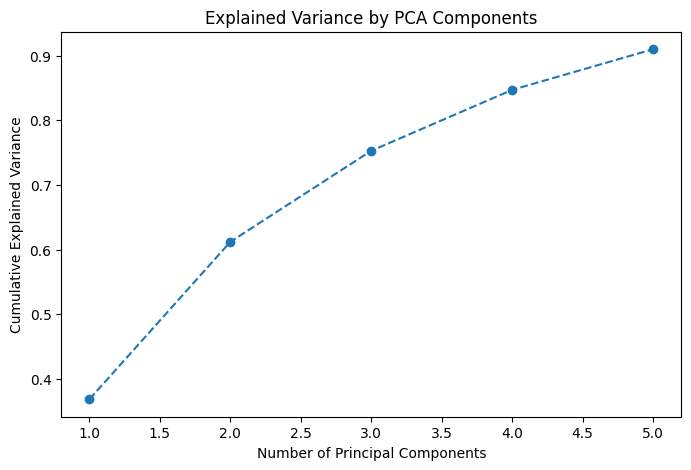

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()